# Homework 2

The ⁴$\text{He}$ abundance is given by mass fraction, but the others are by number. Compute the
primordial ⁴He abundance in the linear scale, $n(⁴\text{He})/n(\text{H})$, and compute the others in the log
scale where $A_\text{H}= 12$.

In [46]:
import numpy as np

yp=0.24691
d_h=2.57e-5
helio3_h=10.03e-5
litio7_h=4.72e-5

razao_helio4=0.25*(yp/(1-yp))
abundancia_deuterio=np.log10(d_h)+12
abundancia_helio3=np.log10(helio3_h)+12
abundancia_litio=np.log10(litio7_h)+12

print(razao_helio4)
print(abundancia_deuterio)
print(abundancia_helio3)
print(abundancia_litio)

0.08196563491747334
7.409933123331294
8.001300933020417
7.6739419986340875


Use the whole dataset to compute in the linear scale, the following quantities for (A) to (C):

A) average linear D/H value

B) median linear D/H value

C) weighted mean of linear D/H (as weights, use the square of the inverse error bars, 1/$\sigma^2$).

D) Compute the average value using only the results recommended in the last column.

E) Which value from (A) to (C) agree better with the result from (D)?

F) Which value from (A) to (C) agree better with the BBN prediction from Fields et al. (2020)?

G) Using the table above, make a plot of D/H vs. [O/H] including the error bars in D/H. Plot a horizontal
solid red line showing the central value of the BBN prediction from Fields et al. (2020) and horizontal
red dashed lines with +/- the error of the prediction. Include also a dotted blue horizontal line with your
answer from (F).

A) A média de D/H é 2.404e-05
B) A mediana de D/H é 2.477e-05
[0.88715601 0.92044957 0.94623716 0.95940063 0.88715601 0.9332543
 0.94623716 0.73451387 0.63095734 0.79432823 0.50118723 0.54954087
 0.63095734 0.87902252 0.96382902 0.73790423 0.93756201]
C) A média ponderada (pelas incertezas nas medidas) de log(D/H) é 2.462e-05
D) A média de log(D/H) utilizando valores que satisfizeram o critério é 2.447e-05
E) A diferença entre A) e D) é 4.219e-07
   A diferença entre B) e D) é 3.089e-07
   A diferença entre C) e D) é 1.518e-07
   Logo o resultado de C) é o que mais concorda com D)
F) A diferença entre A) e Fields et. al (2020) é 1.657e-06
   A diferença entre B) e Fields et. al (2020) é 9.258e-07
   A diferença entre C) e Fields et. al (2020) é 1.083e-06
   Logo o resultado de B) é o que mais concorda com Fields et. al (2020)


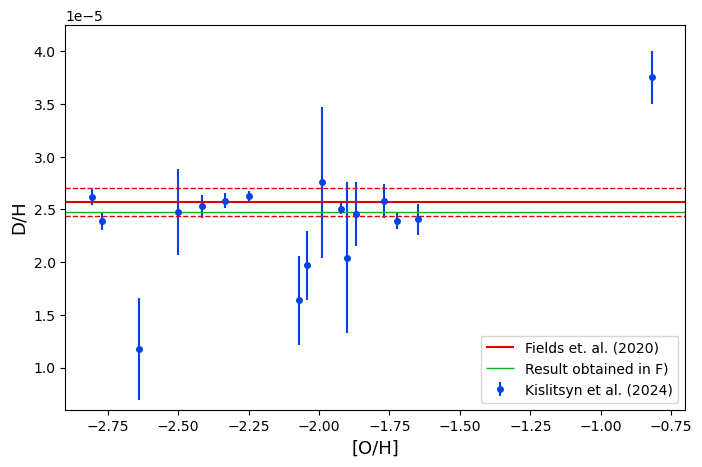

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

bbn=pd.read_csv("bbn_data.csv", names=['QSO', '[O/H]', 'log(D/H)', 'errlog(D/H)','Reference', 'Meet Criteria?'], header=0)
linear= 10**(np.array(bbn['log(D/H)']))
print("A) A média de D/H é {:.3e}".format(np.mean(linear)))
print("B) A mediana de D/H é {:.3e}".format(np.median(linear)))

pesos=1/((10**(np.array(bbn['errlog(D/H)'])))**2)
print(pesos)
ponderada=sum(linear*pesos)/sum(pesos)
print("C) A média ponderada (pelas incertezas nas medidas) de log(D/H) é {:.3e}".format(ponderada))

bbn_filtrado=bbn[bbn['Meet Criteria?'] == 1]
linear_filtrado=(10**(np.array(bbn_filtrado['log(D/H)'])))
print("D) A média de log(D/H) utilizando valores que satisfizeram o critério é {:.3e}".format(np.mean(linear_filtrado)))
a_d=abs(np.mean(linear) - np.mean(linear_filtrado))
b_d=abs(np.median(linear) - np.mean(linear_filtrado))
c_d=abs(ponderada - np.mean(linear_filtrado))
print("E) A diferença entre A) e D) é {:.3e}\n   A diferença entre B) e D) é {:.3e}\n   A diferença entre C) e D) é {:.3e}\n   Logo o resultado de C) é o que mais concorda com D)".format(a_d, b_d, c_d))
a_d=abs(np.mean(linear) - d_h)
b_d=abs(np.median(linear) - d_h)
c_d=abs(ponderada - d_h)
print("F) A diferença entre A) e Fields et. al (2020) é {:.3e}\n   A diferença entre B) e Fields et. al (2020) é {:.3e}\n   A diferença entre C) e Fields et. al (2020) é {:.3e}\n   Logo o resultado de B) é o que mais concorda com Fields et. al (2020)".format(a_d, b_d, c_d))

soma=bbn['log(D/H)']+bbn['errlog(D/H)']
linear_soma=10**(np.array(soma))
bbn['err(D/H)']=abs(linear_soma-linear)

g1=plt.figure(figsize=(8,5))
plt.errorbar(np.array(bbn['[O/H]']), linear, yerr=np.array(bbn['err(D/H)']), marker='o', linestyle='', markersize=4, color='xkcd:blue', label='Kislitsyn et al. (2024)')
plt.xlabel('[O/H]', fontsize=13)
plt.ylabel(r'D/H', fontsize=13)
plt.hlines(d_h,-2.9, -0.7, color='xkcd:red', label='Fields et. al. (2020)')
plt.hlines(d_h+0.13e-5,-2.9, -0.7, color='xkcd:red', linestyles='dashed', linewidth=1)
plt.hlines(d_h-0.13e-5,-2.9, -0.7, color='xkcd:red', linestyles='dashed', linewidth=1)
plt.hlines(np.median(linear),-2.9, -0.7, color='xkcd:green', label='Result obtained in F)', linewidth=1)
plt.xlim(-2.9, -0.7)
plt.ylim(0.6e-5, 4.25e-5)
plt.legend(loc='lower right')
plt.show()